#__Applying Support Vector Machine__

Let's examine how to construct a support vector machine.

## Step 1: Import Required Libraries and Load the Dataset

- Install and import required libraries: NumPy, pandas, Seaborn, matplotlib, and scikit-learn
- Load the heart.csv dataset


In [2]:
# !pip install --upgrade scikit-learn

In [3]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay

In [4]:
df = pd.read_csv("../../Datasets/heart.csv")

## Step 2: Explore and visualize the dataset

- Display dataset information and summary statistics
- Create a scatter plot of age and cholesterol
- Check for missing values
-  Describe and see the basic statistic of the given features


In [5]:
df.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,typical,145,233,1,2,150,0,2.3,3,0,fixed,No
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3,normal,Yes
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2,reversable,Yes
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0,normal,No
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0,normal,No


__Observation__
- Here, we can see a few rows of the dataset.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        303 non-null    int64  
 1   Sex        303 non-null    int64  
 2   ChestPain  303 non-null    object 
 3   RestBP     303 non-null    int64  
 4   Chol       303 non-null    int64  
 5   Fbs        303 non-null    int64  
 6   RestECG    303 non-null    int64  
 7   MaxHR      303 non-null    int64  
 8   ExAng      303 non-null    int64  
 9   Oldpeak    303 non-null    float64
 10  Slope      303 non-null    int64  
 11  Ca         303 non-null    int64  
 12  Thal       303 non-null    object 
 13  AHD        303 non-null    object 
dtypes: float64(1), int64(10), object(3)
memory usage: 33.3+ KB


__Observations__
- As you can see here, we have 303 observations and 14 features.
- All the features have a numeric data type except for ChestPain and Thal,
and there are no missing values.

Let’s describe and see the basic statistics of these features.

In [7]:
df.describe()

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.683168
std,9.038662,0.467299,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.944808
min,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000


__Observations__
- The average age is 54, and the standard deviation is 9.
- The average cholesterol is 246.

- Let’s plot age and cholesterol.
- Let's see if there is any relationship between age and cholesterol.

Text(0.5, 1.0, 'Age-Cholesterol Plot')

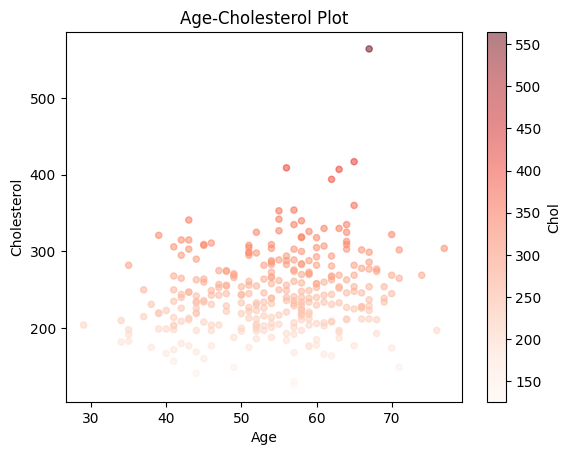

In [8]:
df.plot(kind='scatter', x='Age', y='Chol', alpha=0.5, c='Chol', cmap='Reds')
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.title('Age-Cholesterol Plot')

__Observations__
- Clearly, we can see if the age increases, cholesterol is also high.

In [9]:
df.isna().sum()

Age          0
Sex          0
ChestPain    0
RestBP       0
Chol         0
Fbs          0
RestECG      0
MaxHR        0
ExAng        0
Oldpeak      0
Slope        0
Ca           0
Thal         0
AHD          0
dtype: int64

## Step 3: Preprocess the Dataset

- Create dummy variables for categorical features
- Separate feature and target matrices
- Split the dataset into training and testing sets


In [10]:
df_new = pd.get_dummies(df, columns= ['ChestPain', 'Thal'],drop_first= True)

Let's create x and y.

In [11]:
x = df_new.drop('AHD',axis = 1) 
y = df_new.AHD

Let's split the data into train and test.

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=100)

## Step 4: Perform Hyperparameter Tuning and Fit the SVM Model
- Let’s import the GridSearchCV from the model selection.
- Create an SVM classifier
- Define the parameter grid for tuning
- Use GridSearchCV for hyperparameter tuning
- The values inserted into param_grid are SVM model hyperparameter values such as C, Gamma, and kernel.
- Fit the model to the training data


In [13]:
from sklearn.model_selection import GridSearchCV

# C-Support Vector machine algorithm
ml = svm.SVC() 
# hyperparameters for the model
param_grid = {'C': [ 1, 10, 100, 1000,10000], 
              'gamma': [1,0.1,0.01,0.001,0.0001],
              'kernel': ['rbf']} 

#we find the best parameters
grid = GridSearchCV(ml, param_grid, refit = True, verbose = 1, cv=5, n_jobs=-1)
  
grid_search=grid.fit(x_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


In [14]:
print(grid_search.best_params_)

{'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}


__Observation__
- Based on the grid search, the best parameters are C at 10, gamma at 0.001, and kernel at rbf.

## Step 5: Evaluate the Model

- Calculate the accuracy of the training data
- Predict the target variable for the test data
- Calculate the accuracy of the test data
- Display the confusion matrix and classification report

In [15]:
accuracy = grid_search.best_score_ 


In [16]:
accuracy

0.7561224489795918

__Observation__
- The accuracy is 75%.

In [17]:
y_test_hat = grid.predict(x_test)

Let's check the confusion matrix for the test case.

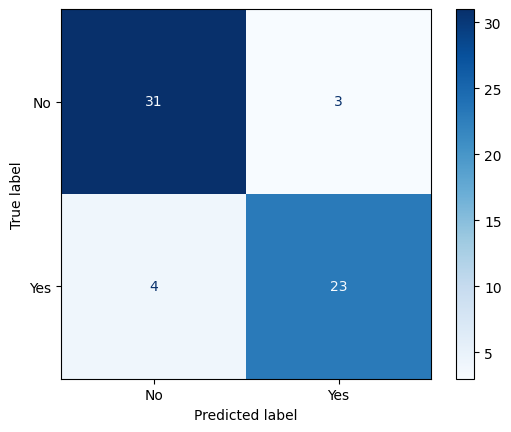

In [18]:
confusion_mat = confusion_matrix(y_test, y_test_hat)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_mat, display_labels=grid.classes_)
disp.plot(cmap=plt.cm.Blues, ax=plt.gca())
plt.show()

__Observations__
- There are 31 cases where the model has misclassified as **No** instead of **Yes**.
- 23 cases are predicted as **Yes** instead of **No**.

Let's check the classification report.

In [19]:
print(classification_report(y_test,y_test_hat))

              precision    recall  f1-score   support

          No       0.89      0.91      0.90        34
         Yes       0.88      0.85      0.87        27

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.88        61



__Observation__
- We can see from the result that the accuracy is 0.89, while the precision and recall are 0.88 and 0.85, respectively.